<a href="https://colab.research.google.com/github/manal-t07/Neural-Networks/blob/main/CNN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Training and implementing CNN in keras
from keras.datasets import mnist

#download mnist dataset into train/test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


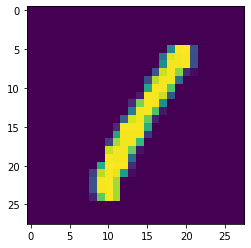

In [3]:
#Testing the loaded data
import matplotlib.pyplot as plt

#view the handwritten images
plt.imshow(X_train[3])

In [4]:
#checking the shape/the size of the 2D array of each image
X_train[0].shape

(28, 28)

In [5]:
#checking the type of the array
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
# Data preprocessing
# Reshaping dataset inputs to shape that the model expects
# params(number_of_images, x_rows, y_rows, 1(greyscale/1 color chanel) images 

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [16]:
print(y_train[1])

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [14]:
# one hot representation
from keras.utils import to_categorical

# encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
print(y_train[1])

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [26]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [27]:
# compiling the model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# training the model
model.fit(X_train, y_train, validation_data=(X_test, y_test))

ValueError: ignored

In [30]:
y_pred = model.predict(X_test)

313/313 [==============================] - 7s 22ms/step


In [31]:
y_pred = ((y_pred).argmax(axis=1))
y_true = (y_test.argmax(axis=1))

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, output_dict=True)

In [33]:
import seaborn as sns
import pandas as pd
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, cap="Greens", annot=True)

NameError: ignored